<a href="https://colab.research.google.com/github/Ferclemens/estadisticas-tps/blob/main/tp1-simulacion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Entrega 1

## Equipo 1
### (integrantes por orden alfabético):

|Nombre y apellido|Cumpleaños|
|-|-|
|Lucas Ciminelli|18/12/1995|
|Fernando Oscar Clemens|16/12/1989|
|Branko Haberkon|15/10/1987|
|Camila Lerman|07/04/1998|
|Matías Lorenzo|01/12/1979|
|Martín Morondo|23/02/1999|

---
## Enunciado:

En un grupo de k personas elegidas al azar, ¿cuál es la probabilidad de que haya al menos dos que cumplan años el mismo día?

Para comenzar, hagamos algunos supuestos:
- consideremos que un año tiene 365 días (¡sí, pobres lxs que cumplen el 29 de febrero!);
- consideremos que es igualmente probable haber nacido cualquier día del año;
- descartemos la posibilidad de que haya gemelxs en el grupo de personas.

Estos supuestos son necesarios para poder modelar el experimento de una forma sencilla.

Armar una simulación basada en N=1000 repeticiones que permita estimar la probabilidad de que al menos dos personas en un grupo de k personas elegidas al azar cumpla años el mismo día. Dar una lista de las probabilidades estimadas en función de k para k entre 1 y 50.

__[OPCIONAL]__ Si es posible, representar esas probabilidades estimadas en un gráfico.

 [Link al enunciado ](https://colab.research.google.com/drive/1JuSVcpMHwG7AkT56X8Du0Uz8Tzv0lnan#scrollTo=qZ_EPsV_P491)


La probabilidad de que dos personas cumplan años el mismo día de un grupo de 50 personas es 97.30% si se repite el experimento 1000 veces.


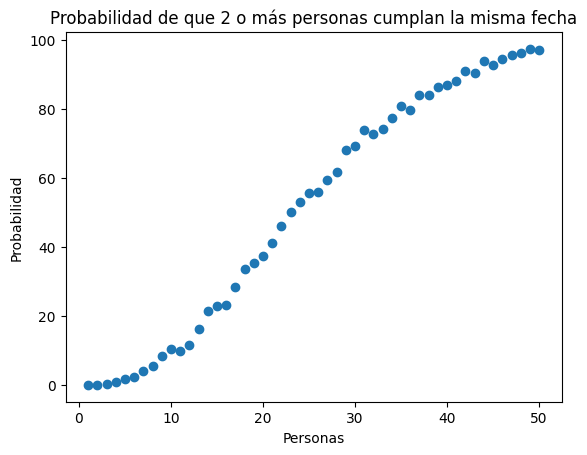



La probabilidad de que dos personas cumplan años el mismo día de un grupo de 20 personas es 43.80% si se repite el experimento 1000 veces.


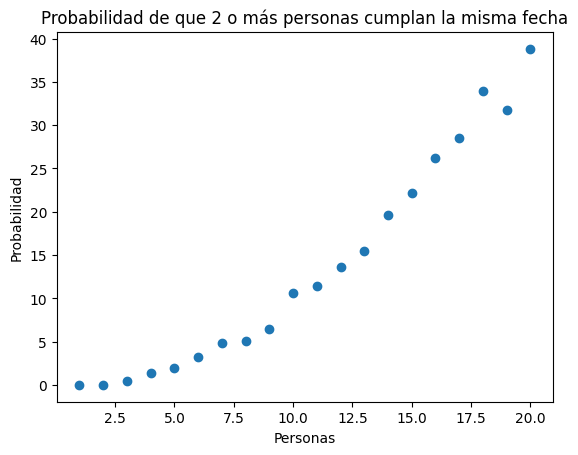



La probabilidad de que dos personas cumplan años el mismo día de un grupo de 1 personas es 0.00% si se repite el experimento 1000 veces.
Es decir, en este caso, es imposible.


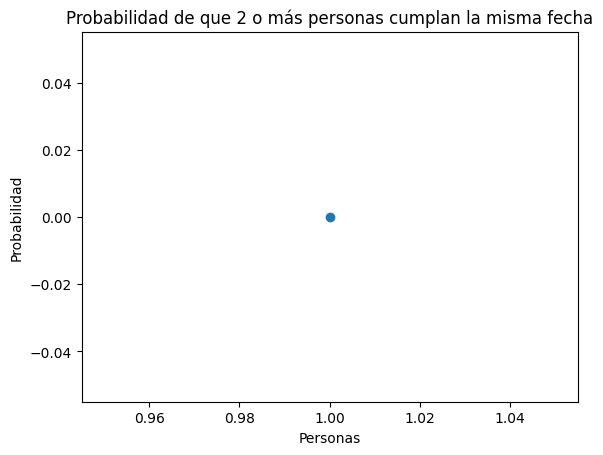



Ejecutar simulación en 50, 20 y 1 invitado, con probabilidad negativa.
La probabilidad de que dos personas cumplan años el mismo día de un grupo de 50 personas es 97.04% si se repite el experimento 1000 veces.


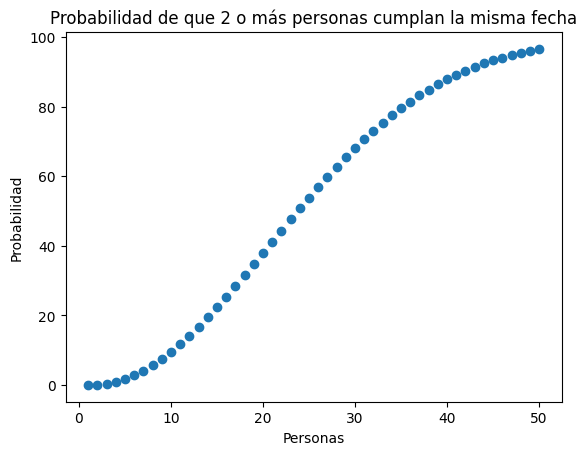



La probabilidad de que dos personas cumplan años el mismo día de un grupo de 20 personas es 41.14% si se repite el experimento 1000 veces.


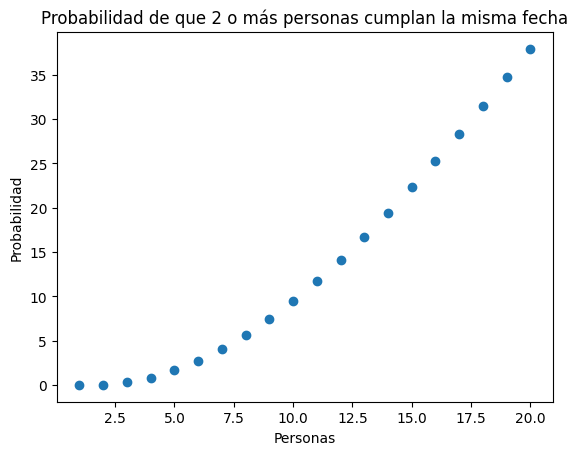



La probabilidad de que dos personas cumplan años el mismo día de un grupo de 1 personas es 0.00% si se repite el experimento 1000 veces.
Es decir, en este caso, es imposible.


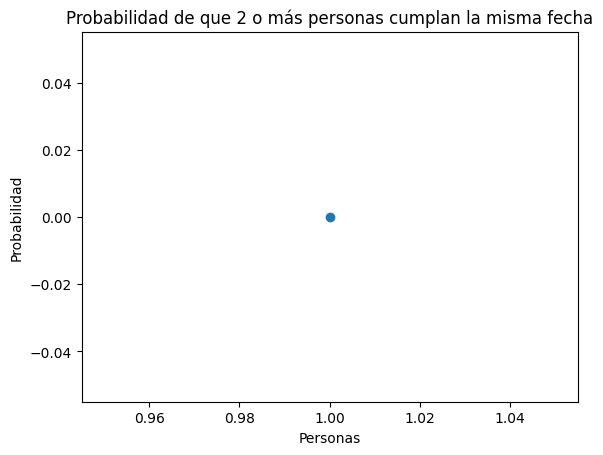

In [ ]:
# Importar librerias para graficar y generar números aleatorios
import matplotlib.pyplot as plt
import random

# -----------------------------
# Definir funciones auxiliares
def cumples(invitados):
  """
  Dado un número entero, devuelve esa cantidad de fechas de cumpleaños. (Entero entre 1 y 365)
  Args:
    invitados(entero): Cantidad de invitados
  Returns:
    cumpleaños(array): Array de cumpleaños
  """
  cumpleaños=[]
  for i in range(0, invitados):
    cumpleaños.append(random.randint(1,365))
  return cumpleaños

def hay_coincidencia(array_cumples):
  """
  Comprueba si hay elementos duplicados en la matriz dada.
  Argumentos:
      array_cumples (lista): Lista de entrada para comprobar si hay duplicados.
  Returns:
      boolean: determinando si hay o no fechas de cumpleaños repetidas (true o false).
  """
  return len(array_cumples) != len(set(array_cumples))

def graficar(eje_x, eje_y, titulo):
    plt.scatter(eje_x, eje_y)
    plt.xlabel('Personas')
    plt.ylabel('Probabilidad')
    plt.title(titulo)
    plt.show()

def proporcion_coincidencia(k, N, probabilidad_negativa):
  """
    Dada una cantidad de N casos, estimar la probabilidad de que al menos dos personas en un grupo de k personas elegidas al azar cumpla años el mismo día.
    Argumentos:
      k(entero): Cantidad de personas
      N(entero): Cantidad de casos
    Returns:
      proporcion(float): Probabilidad de que al menos dos personas comparten el mismo cumpleaños, redondeado a 2 decimales.
  """
  if probabilidad_negativa == 1:
    for dia in range(365, 365 - k, -1):
        probabilidad_negativa *= dia/365
    proporcion = (1 - probabilidad_negativa) * 100
    return proporcion
  else:
    # Crear N muestras de k invitados
    muestras = [cumples(k) for _ in range(N)]

    # Iterar las muestras y contar cuántas tienen coincidencias
    contador_coincidencias = 0
    for muestra in muestras:
      if hay_coincidencia(muestra):
              contador_coincidencias+=1

    proporcion = contador_coincidencias / len(muestras) * 100

    return proporcion

# -----------------------------
# Definir función principal
def simular(k, N, probabilidad_negativa = 0):
  """
    Dada una cantidad de N repeticiones, dibujar la probabilidad de que al menos dos personas cumplan años el mismo día elegidas al azar en grupos de 2 hasta k personas .
    Argumentos:
      k(entero): Cantidad de personas
      N(entero): Cantidad de repeticiones
      probabilidad_negativa(entero): Si se pasa 1 como argumento, se utilizará el método en que disminuimos el #E con cada iteración (conjunto E: "ninguna de las k personas del grupo cumple años el mismo día").
    Returns:
      -
    Prints:
      mensaje(texto).
      Gráfico.
  """

  print(f"La probabilidad de que dos personas cumplan años el mismo día de un grupo de {k} personas es {proporcion_coincidencia(k, N, probabilidad_negativa):.2f}% si se repite el experimento {N} veces.")
  if proporcion_coincidencia(k,N, probabilidad_negativa) == 0:
    print(f"Es decir, en este caso, es imposible.")
  # Crear un array de probabilidades inicializadas en 0 con largo igual a la cantidad de invitados (k)
  probabilidades = [0] * k

  # Calcular las probabilidades para cada cantidad de invitados
  for i in range(1, k):
    probabilidades[i] = proporcion_coincidencia(i, N, probabilidad_negativa)

  # Ejecutar función para graficar
  personas = list(range(1, k+1))  # Lista de números para el eje de coordenadas
  graficar(personas, probabilidades, "Probabilidad de que 2 o más personas cumplan la misma fecha")
  print("\n")


# -----------------------------
# Ejecutar simulación en 50, 20 y 1 invitado.
simular(50,1000)
simular(20,1000)
simular(1,1000)
# -----------------------------
# Ejecutar simulación en 50, 20 y 1 invitado con probabilidad negativa.
print(f"Ejecutar simulación en 50, 20 y 1 invitado, con probabilidad negativa.")
simular(50,1000, 1)
simular(20,1000, 1)
simular(1,1000, 1)

In [ ]:
import random

#Primera opción: Simulación de coincidencia de cumpleaños.

def paradoja_bday(invitados):
    """
    Simula el paradoja de los cumpleaños calculando la probabilidad de que al menos dos personas comparten el mismo cumpleaños en un grupo de un tamaño determinado.

    Args:
        invitados (int): El número de personas en el grupo.

    Returns:
        float: La probabilidad de que al menos dos personas comparten el mismo cumpleaños como porcentaje.
    """
    bday_invitados=[]
    contador_coincidencias=0
    cantidad_simulaciones=0

    def tiene_repetidos(arr):
        """
        Comprueba si hay elementos duplicados en la matriz dada.

        Argumentos:
            arr (lista): Lista de entrada para comprobar si hay duplicados.

        Returns:
                loat: La probabilidad de que al menos dos personas comparten el mismo cumpleaños como porcentaje.
        """
        return len(arr) != len(set(arr))

    for i in range(0,10000):
        for cumple in range(0,invitados):
            bday_invitados.append(random.randint(1,365))
        if tiene_repetidos(bday_invitados):
            contador_coincidencias=contador_coincidencias+1
        bday_invitados=[]
        cantidad_simulaciones=cantidad_simulaciones+1

    print(f"La probabilidad de que dos personas cumplan años el mismo día de un grupo de {invitados} personas es {contador_coincidencias/cantidad_simulaciones*100}%")
    return contador_coincidencias/cantidad_simulaciones*100


p50 = paradoja_bday(50)
p20 = paradoja_bday(40)

#Segunda opción: Cálculo de probabilidad de coincidencia de cumpleaños

def bday_calculo(invitados):
    """
    Calcula la probabilidad de que al menos dos personas compartan el mismo cumpleaños en un grupo de un tamaño determinado.

    Args:
        invitados (int): El número de personas en el grupo.

    Returns:
        float: La probabilidad de que al menos dos personas compartan el mismo cumpleaños.
    """
    probabilidad_negativa= 1

    for dia in range(365,365-invitados,-1):
        probabilidad_negativa *= dia/365


    return print(f"La probabilidad de que dos personas cumplan años el mismo día de un grupo de {invitados} personas es {(1-probabilidad_negativa)*100:.2f}%")

p40=bday_calculo(40)
p57=bday_calculo(57)
p1=bday_calculo(1)

La probabilidad de que dos personas cumplan años el mismo día de un grupo de 50 personas es 97.04%
La probabilidad de que dos personas cumplan años el mismo día de un grupo de 40 personas es 88.84%
La probabilidad de que dos personas cumplan años el mismo día de un grupo de 40 personas es 89.12%
La probabilidad de que dos personas cumplan años el mismo día de un grupo de 57 personas es 99.01%
La probabilidad de que dos personas cumplan años el mismo día de un grupo de 1 personas es 0.00%
